In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/Vaksinasi Wilayah2.csv',index_col= False)
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

Kecamatan Kota / Kabupaten  Target Total per Kecamatan  \
0       Cakung    Jakarta Timur                      515628   
1   Cengkareng    Jakarta Barat                      519118   
2   Kali Deres    Jakarta Barat                      406018   
3    Cilincing    Jakarta Utara                      392136   
4  Duren Sawit    Jakarta Timur                      404329   

   Target Harian per Kecamatan  Cakupan Suntik 1      Keterangan  \
0                         5333             74966  Tidak Tercapai   
1                         5041             85668  Tidak Tercapai   
2                         4295             42991  Tidak Tercapai   
3                         4073             41494  Tidak Tercapai   
4                         4006             41413  Tidak Tercapai   

   Cakupan Suntik 2  Cakupan Suntik 1.1    Keterangan.1  Cakupan Suntik 2.1  \
0             37590                 897  Tidak Tercapai                   0   
1             47581                 429  Tidak Tercapai                   1   
2             23222                 162  Tidak Tercapai                  24   
3             22305                  17  Tidak Tercapai                   1   
4             28993                   7  Tidak Tercapai                   4   

   Cakupan Suntik 1.2    Keterangan.2  Cakupan Suntik 2.2  Cakupan Suntik 1.3  \
0                   0  Tidak Tercapai                   0                2258   
1                   0  Tidak Tercapai                   0                3144   
2                   0  Tidak Tercapai                   0                1680   
3                   0  Tidak Tercapai                   0                2239   
4                   0  Tidak Tercapai                   1                1688   

     Keterangan.3  Cakupan Suntik 2.3  Cakupan Suntik 1.4    Keterangan.4  \
0  Tidak Tercapai                  36                1958  Tidak Tercapai   
1  Tidak Tercapai                   0                3480  Tidak Tercapai   
2  Tidak Tercapai                  26                2107  Tidak Tercapai   
3  Tidak Tercapai                  26                3023  Tidak Tercapai   
4  Tidak Tercapai                  49                1662  Tidak Tercapai   

   Cakupan Suntik 2.4  Cakupan Suntik 1.5    Keterangan.5  Cakupan Suntik 2.5  \
0                  37                2296        Tercapai                  32   
1                  21                3275  Tidak Tercapai                   2   
2                   8                2347        Tercapai                  21   
3                   4                2995  Tidak Tercapai                   8   
4                  42                1518  Tidak Tercapai                  46   

   Cakupan Suntik 1.6    Keterangan.6  Cakupan Suntik 2.6  Cakupan Suntik 1.7  \
0                2331  Tidak Tercapai                   9                2961   
1                3965  Tidak Tercapai                  15                3884   
2                2880  Tidak Tercapai                  23                3405   
3                2335  Tidak Tercapai                   3                3876   
4                1650  Tidak Tercapai                  38                1927   

     Keterangan.7  Cakupan Suntik 2.7  Cakupan Suntik 1.8    Keterangan.8  \
0  Tidak Tercapai                  52                 351  Tidak Tercapai   
1  Tidak Tercapai                   0                2405  Tidak Tercapai   
2  Tidak Tercapai                  39                1192  Tidak Tercapai   
3  Tidak Tercapai                  23                 402  Tidak Tercapai   
4  Tidak Tercapai                  92                1049  Tidak Tercapai   

   Cakupan Suntik 2.8  Cakupan Suntik 1.9    Keterangan.9  Cakupan Suntik 2.9  \
0                   0                 137  Tidak Tercapai                   1   
1                   0                2318  Tidak Tercapai                   0   
2                   0                 801  Tidak Tercapai                   0   
3                   1          

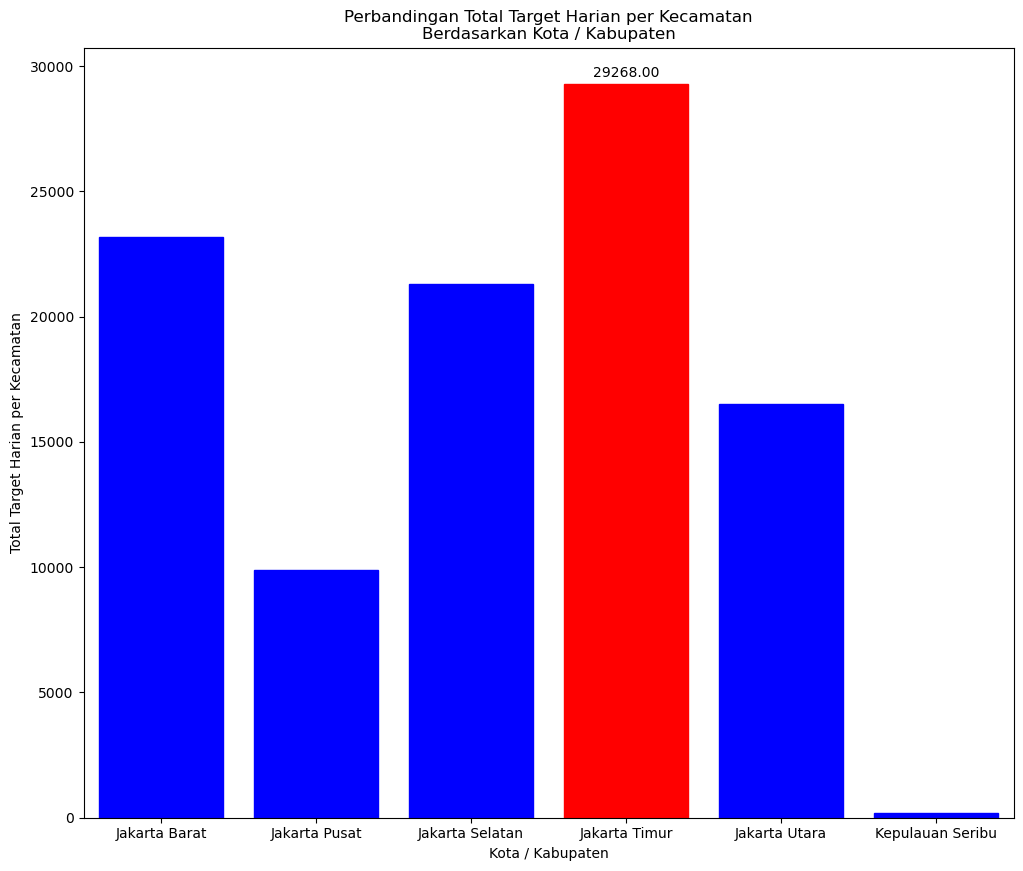

In [3]:
# visualization total sum every kota / kabupaten in jakarta province
region_vaccine_total = df.groupby('Kota / Kabupaten')['Target Harian per Kecamatan'].sum()
fig, ax = plt.subplots(figsize=(12, 10))
bars = sns.barplot(x=region_vaccine_total.index, y=region_vaccine_total.values, ax=ax)
ax.set_xlabel('Kota / Kabupaten')
ax.set_ylabel('Total Target Harian per Kecamatan')
ax.set_title('Perbandingan Total Target Harian per Kecamatan\nBerdasarkan Kota / Kabupaten')
rects = ax.containers[0]
max_value = max(region_vaccine_total)
for rect in rects:
    if rect.get_height() == max_value:
        rect.set_color('red')
        ax.annotate(f'{max_value:.2f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                        xytext=(0, 3),  textcoords='offset points', ha='center', va='bottom')
    else:
        rect.set_color('blue')

plt.show()

In [4]:
numeric_columns = df.select_dtypes(include=['int64'])
total_suntikan = np.sum(numeric_columns.drop(columns=['Target Total per Kecamatan', 'Target Harian per Kecamatan']), axis=1)
df['injection_total'] = total_suntikan
df.head()

Kecamatan Kota / Kabupaten  Target Total per Kecamatan  \
0       Cakung    Jakarta Timur                      515628   
1   Cengkareng    Jakarta Barat                      519118   
2   Kali Deres    Jakarta Barat                      406018   
3    Cilincing    Jakarta Utara                      392136   
4  Duren Sawit    Jakarta Timur                      404329   

   Target Harian per Kecamatan  Cakupan Suntik 1      Keterangan  \
0                         5333             74966  Tidak Tercapai   
1                         5041             85668  Tidak Tercapai   
2                         4295             42991  Tidak Tercapai   
3                         4073             41494  Tidak Tercapai   
4                         4006             41413  Tidak Tercapai   

   Cakupan Suntik 2  Cakupan Suntik 1.1    Keterangan.1  Cakupan Suntik 2.1  \
0             37590                 897  Tidak Tercapai                   0   
1             47581                 429  Tidak Tercapai                   1   
2             23222                 162  Tidak Tercapai                  24   
3             22305                  17  Tidak Tercapai                   1   
4             28993                   7  Tidak Tercapai                   4   

   Cakupan Suntik 1.2    Keterangan.2  Cakupan Suntik 2.2  Cakupan Suntik 1.3  \
0                   0  Tidak Tercapai                   0                2258   
1                   0  Tidak Tercapai                   0                3144   
2                   0  Tidak Tercapai                   0                1680   
3                   0  Tidak Tercapai                   0                2239   
4                   0  Tidak Tercapai                   1                1688   

     Keterangan.3  Cakupan Suntik 2.3  Cakupan Suntik 1.4    Keterangan.4  \
0  Tidak Tercapai                  36                1958  Tidak Tercapai   
1  Tidak Tercapai                   0                3480  Tidak Tercapai   
2  Tidak Tercapai                  26                2107  Tidak Tercapai   
3  Tidak Tercapai                  26                3023  Tidak Tercapai   
4  Tidak Tercapai                  49                1662  Tidak Tercapai   

   Cakupan Suntik 2.4  Cakupan Suntik 1.5    Keterangan.5  Cakupan Suntik 2.5  \
0                  37                2296        Tercapai                  32   
1                  21                3275  Tidak Tercapai                   2   
2                   8                2347        Tercapai                  21   
3                   4                2995  Tidak Tercapai                   8   
4                  42                1518  Tidak Tercapai                  46   

   Cakupan Suntik 1.6    Keterangan.6  Cakupan Suntik 2.6  Cakupan Suntik 1.7  \
0                2331  Tidak Tercapai                   9                2961   
1                3965  Tidak Tercapai                  15                3884   
2                2880  Tidak Tercapai                  23                3405   
3                2335  Tidak Tercapai                   3                3876   
4                1650  Tidak Tercapai                  38                1927   

     Keterangan.7  Cakupan Suntik 2.7  Cakupan Suntik 1.8    Keterangan.8  \
0  Tidak Tercapai                  52                 351  Tidak Tercapai   
1  Tidak Tercapai                   0                2405  Tidak Tercapai   
2  Tidak Tercapai                  39                1192  Tidak Tercapai   
3  Tidak Tercapai                  23                 402  Tidak Tercapai   
4  Tidak Tercapai                  92                1049  Tidak Tercapai   

   Cakupan Suntik 2.8  Cakupan Suntik 1.9    Keterangan.9  Cakupan Suntik 2.9  \
0                   0                 137  Tidak Tercapai                   1   
1                   0                2318  Tidak Tercapai                   0   
2                   0                 801  Tidak Tercapai                   0   
3                   1          

In [5]:
comparison_injection_region=df.groupby('Kota / Kabupaten')['Target Total per Kecamatan','injection_total'].sum()
comparison_injection_region

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\2400809556.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  comparison_injection_region=df.groupby('Kota / Kabupaten')['Target Total per Kecamatan','injection_total'].sum()


,Target Total per Kecamatan,injection_total
Kota / Kabupaten,,
Jakarta Barat,2321771,3954110
Jakarta Pusat,1010815,3951716
Jakarta Selatan,2149465,5647512
Jakarta Timur,2917881,4806922
Jakarta Utara,1658219,3418309
Kepulauan Seribu,25565,48107
